# Momentum

A stock that's going up tends to keep going up...until it doesn't.  Momentum is the theory that stocks that have recently gone up will keep going up disproportionate to their underlying value because folks are overenthusiastic about them.

    On the first trading day of each week
    1. The SPY is higher than 'lookback' months ago, buy
    2. If the SPY is lower than 'lookback' months ago, sell your long position.
    
    The 'lookback' time period can be random, meaning a random lookback period is used for each new position.
    
    Optimize: lookback period in number of months.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

Define Optimizations

In [4]:
# Pick one
optimize_lookback = True
optimize_margin   = False

# Define lookback ranges
if optimize_lookback:
    Xs = range(3, 18+1)
    Xs = [str(X) for X in Xs]

# Define margin ranges
elif optimize_margin:
    Xs = range(10, 41, 2)
    Xs = [str(X) for X in Xs]

In [5]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'lookback': None,
    'margin': 1
}

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_lookback:
        options['lookback'] = int(X)
    elif optimize_margin:
        options['margin'] = int(X)/10
        
    strategies[X] = strategy.Strategy(symbol, capital, start, end, options) 
    strategies[X].run()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = pf.optimizer_summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,4.17,4.82,6.47,7.57,6.14,6.96,7.44,7.09,6.49,7.01,7.85,7.31,6.79,6.66,6.52,7.14
max_closed_out_drawdown,-34.04,-35.55,-25.83,-26.97,-26.91,-25.69,-27.34,-27.54,-31.08,-25.07,-20.01,-31.23,-29.10,-33.28,-31.22,-34.47
annualized_return_over_max_drawdown,0.12,0.14,0.25,0.28,0.23,0.27,0.27,0.26,0.21,0.28,0.39,0.23,0.23,0.20,0.21,0.21
drawdown_recovery_period,2483.00,3742.00,2411.00,317.00,317.00,508.00,512.00,512.00,701.00,239.00,497.00,345.00,290.00,247.00,330.00,783.00
best_month,15.04,15.00,15.18,15.14,15.15,15.03,17.79,17.77,17.76,17.79,17.76,17.78,17.78,17.94,17.78,17.77
worst_month,-14.27,-18.90,-18.94,-18.91,-18.85,-18.92,-22.08,-22.07,-22.08,-18.87,-18.91,-29.08,-29.10,-29.09,-29.07,-22.04
sharpe_ratio,0.41,0.46,0.58,0.66,0.54,0.59,0.62,0.59,0.55,0.57,0.63,0.57,0.53,0.52,0.52,0.57
sortino_ratio,0.42,0.49,0.64,0.72,0.58,0.65,0.68,0.66,0.60,0.64,0.71,0.63,0.58,0.57,0.57,0.64
monthly_std,3.05,3.09,3.06,3.07,3.25,3.26,3.33,3.28,3.41,3.29,3.27,3.48,3.59,3.68,3.65,3.56
pct_time_in_market,68.41,69.53,69.94,72.03,72.40,74.19,75.00,75.13,75.24,76.46,76.49,77.07,78.13,78.26,78.82,79.04


Bar graphs

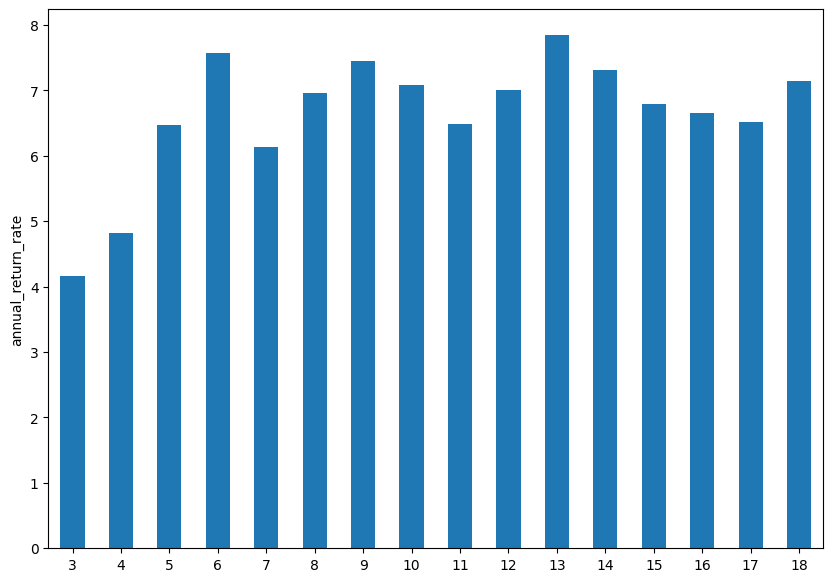

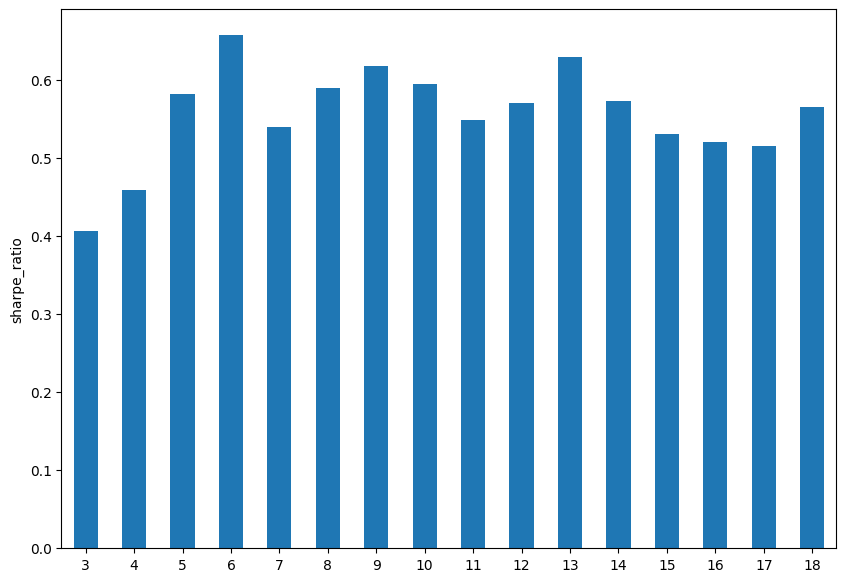

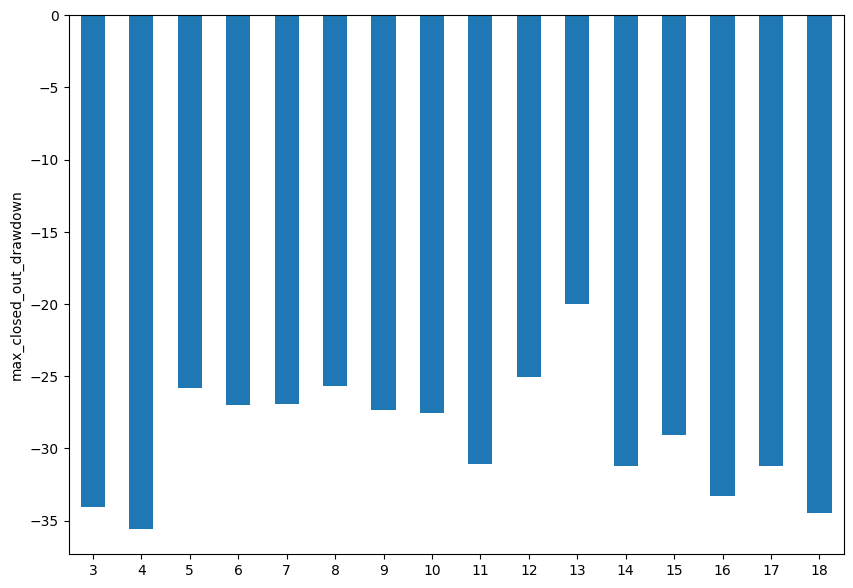

In [8]:
pf.optimizer_plot_bar_graph(df, 'annual_return_rate')
pf.optimizer_plot_bar_graph(df, 'sharpe_ratio')
pf.optimizer_plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end, use_adj=True)
benchmark.run()

Equity curve

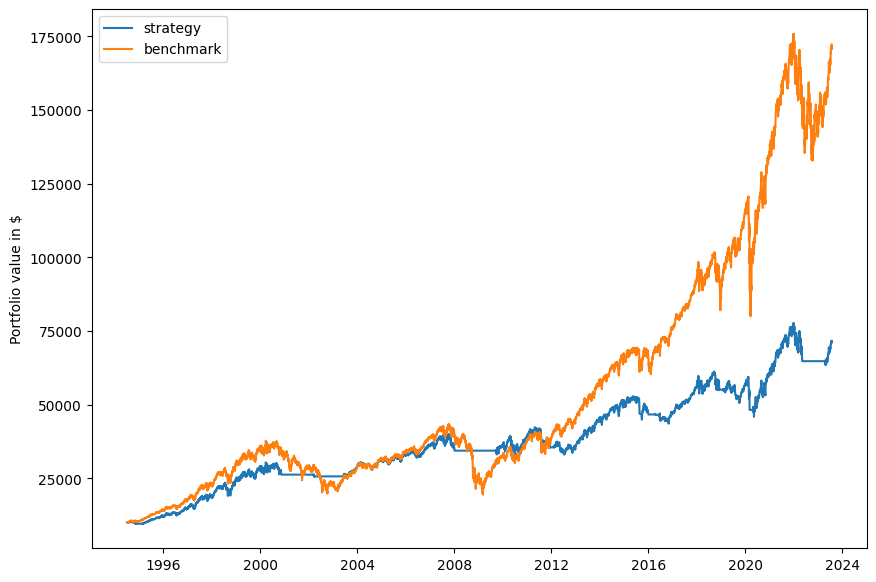

In [10]:
if   optimize_lookback: Y = '12'
elif optimize_margin:   Y = '20'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)